In [ ]:
# Linear Discriminant Analysis
# Find a projection of data such that classes are best separated.
# PCA: find projection such that the variance is best explained while reducing the # of features

In [15]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
data = datasets.load_iris()
X = data.data
y = data.target

In [10]:
class LDA:
    
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None # i.e., eigenvectors
    
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        
        # S_w: within-class scatter
        # S_b: between-class scatter
        mean_overall = np.mean(X, axis=0)
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))
        
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            S_W += (X_c - mean_c).T.dot(X_c - mean_c) # (n_c x n_features)^T %*% (n_c x n_features) = n_features x n_features
            
            n_c = X_c.shape[0] # n_samples in class c
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1) # n_features x 1 matrix
            
            S_B += n_c * (mean_diff).dot(mean_diff.T)
            
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigvectors = eigenvectors.T# just to make calculations easier
        idxs = np.argsort(abs(eigenvalues))[0::-1] # reverse the order
        eigenvalues = eigenvalues[idxs]
        eigvectors = eigvectors[idxs]
        
        self.linear_discriminants = eigenvectors[0:self.n_components]
        
    def transform(self, X):
        # project data onto the new axes obtained from LDA
        return np.dot(X, self.linear_discriminants.T)
        

In [13]:
lda = LDA(n_components=2)
lda.fit(X, y)
X_projected = lda.transform(X)


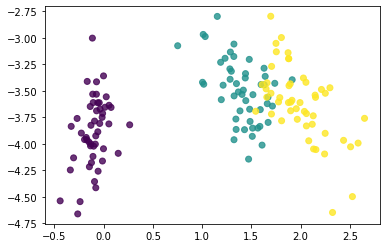

In [20]:
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(x1, x2, c=y, alpha=0.8, cmap=plt.cm.get_cmap('viridis', 3))